## Reto 2: Variaciones de scatterplots

### 1. Objetivos:
- Aprender a generar e interpretar un par de variantes de las gráficas de dispersión
 
---
    
### 2. Desarrollo:

### a) Explorando determinantes de calidad en vinos rojos

Vamos a utilizar el dataset `wine_quality_red-clean.csv` para ver si podemos descubrir algunas de las características que hacen que un vino tenga más o menos calidad.

Cada fila en el dataset contiene información acerca de un tipo de vino y una clasificación de calidad ('quality'). Queremos explorar un poco las relaciones entre las variables independientes para ver si hay alguna relación que explique un poco la diferencia de calidad.

Tu Reto consiste en lo siguiente:

1. Elige un par de variables independientes que creas que podrían explicar la calidad de un vino.
2. Genera un scatterplot por categorías utilizando las dos variables que elegiste y la variable 'quality' para determinar el color de tus puntos. Asegúrate de que tu gráfica tenga el título y nombres de ejes adecuados. Elige también una paleta de colores que te sean agradables.
3. Utilizando esta gráfica, evalúa si crees que la relación entre estas dos variables explica aunque sea moderamente la diferencia de calidad en los vinos. Si no crees que las variables expliquen la calidad en lo más mínimo, repite los pasos 1 y 2 usando un par distinto de variables.
4. Una vez que encuentres un par de variables que expliquen moderadamente la calidad del vino (remarco la palabra 'moderadamente'), genera una serie de scatterplots con variable condicionante para explorar más a detalle la relación. Realiza una gráfica por cada puntaje de calidad. Asegúrate de que cada gráfica tenga el nombre adecuado y de que todo el conjunto sea agradable a la vista y fácil de interpretar.
5. Comenta con tus compañeros y la experta tus hallazgos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/wine_quality_red-clean.csv", index_col=0)
df.sample(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
628,8.7,0.54,0.26,2.5,0.097,7.0,31.0,0.99760,3.27,0.60,9.3,6
772,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4,5
872,7.3,0.35,0.24,2.0,0.067,28.0,48.0,0.99576,3.43,0.54,10.0,4


_Este reto lo usaré para mostrarles otra manera de crear scatterplots de una manera "intuitiva".  
**Spoiler**: Hay que leer la documentación_

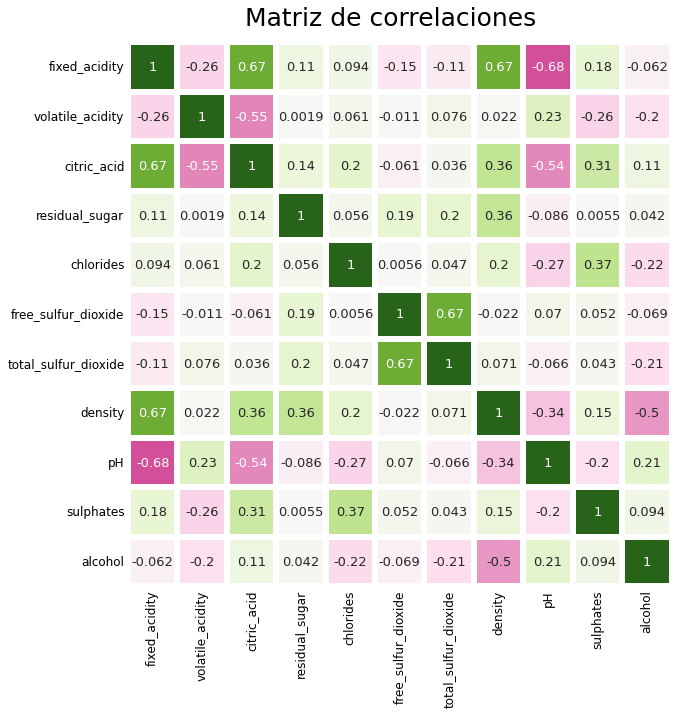

In [2]:
# 1. Generar matriz de correlaciones (reto pasado)
fig, ax = plt.subplots(figsize = (10,10))
fig.suptitle("Matriz de correlaciones", size = 25, y = 0.93)
heatmap_corr = sns.heatmap(data = df.drop(columns=['quality']).corr(),
                           ax = ax,
                           annot = True, # anotar los valores dentro de los recuadros
                           annot_kws = {'size':13}, # Cambiar tamaño de letra de
                                                    # dentro de recuadros
                           cmap = "PiYG",
                           center = 0, 
                           vmin = -1,
                           vmax = 1,
                           square = True, # Que sean cuadrados y no rectangulos
                           cbar = False, # Eliminaremos la color bar porque ya 
                                        # tenemos los valores anotados
                           linewidths = 5, # Grosor de las lineas que separan 
                                           # los recuadros
                           linecolor = 'white' # por defecto es 'white'
                           )

# Quitar lineas de ticks del heatmap
ax.tick_params(axis='both', length=0, labelsize=12)

Algo a cambiar es el tipo de dato que es `'quality'`. Muchas operaciones la tomarán como una variable continua por ser numérica, por ejemplo la paleta de colores la tomara como variable continua. 

Para tener una paleta de colores discreta, es importante transformarla a `pandas.Category`

In [4]:
df['quality'] = df['quality'].astype(pd.CategoricalDtype(categories = [3,4,5,6,7,8], ordered=True))

Vamos a visualizar los datos con un `sns.pairplot`

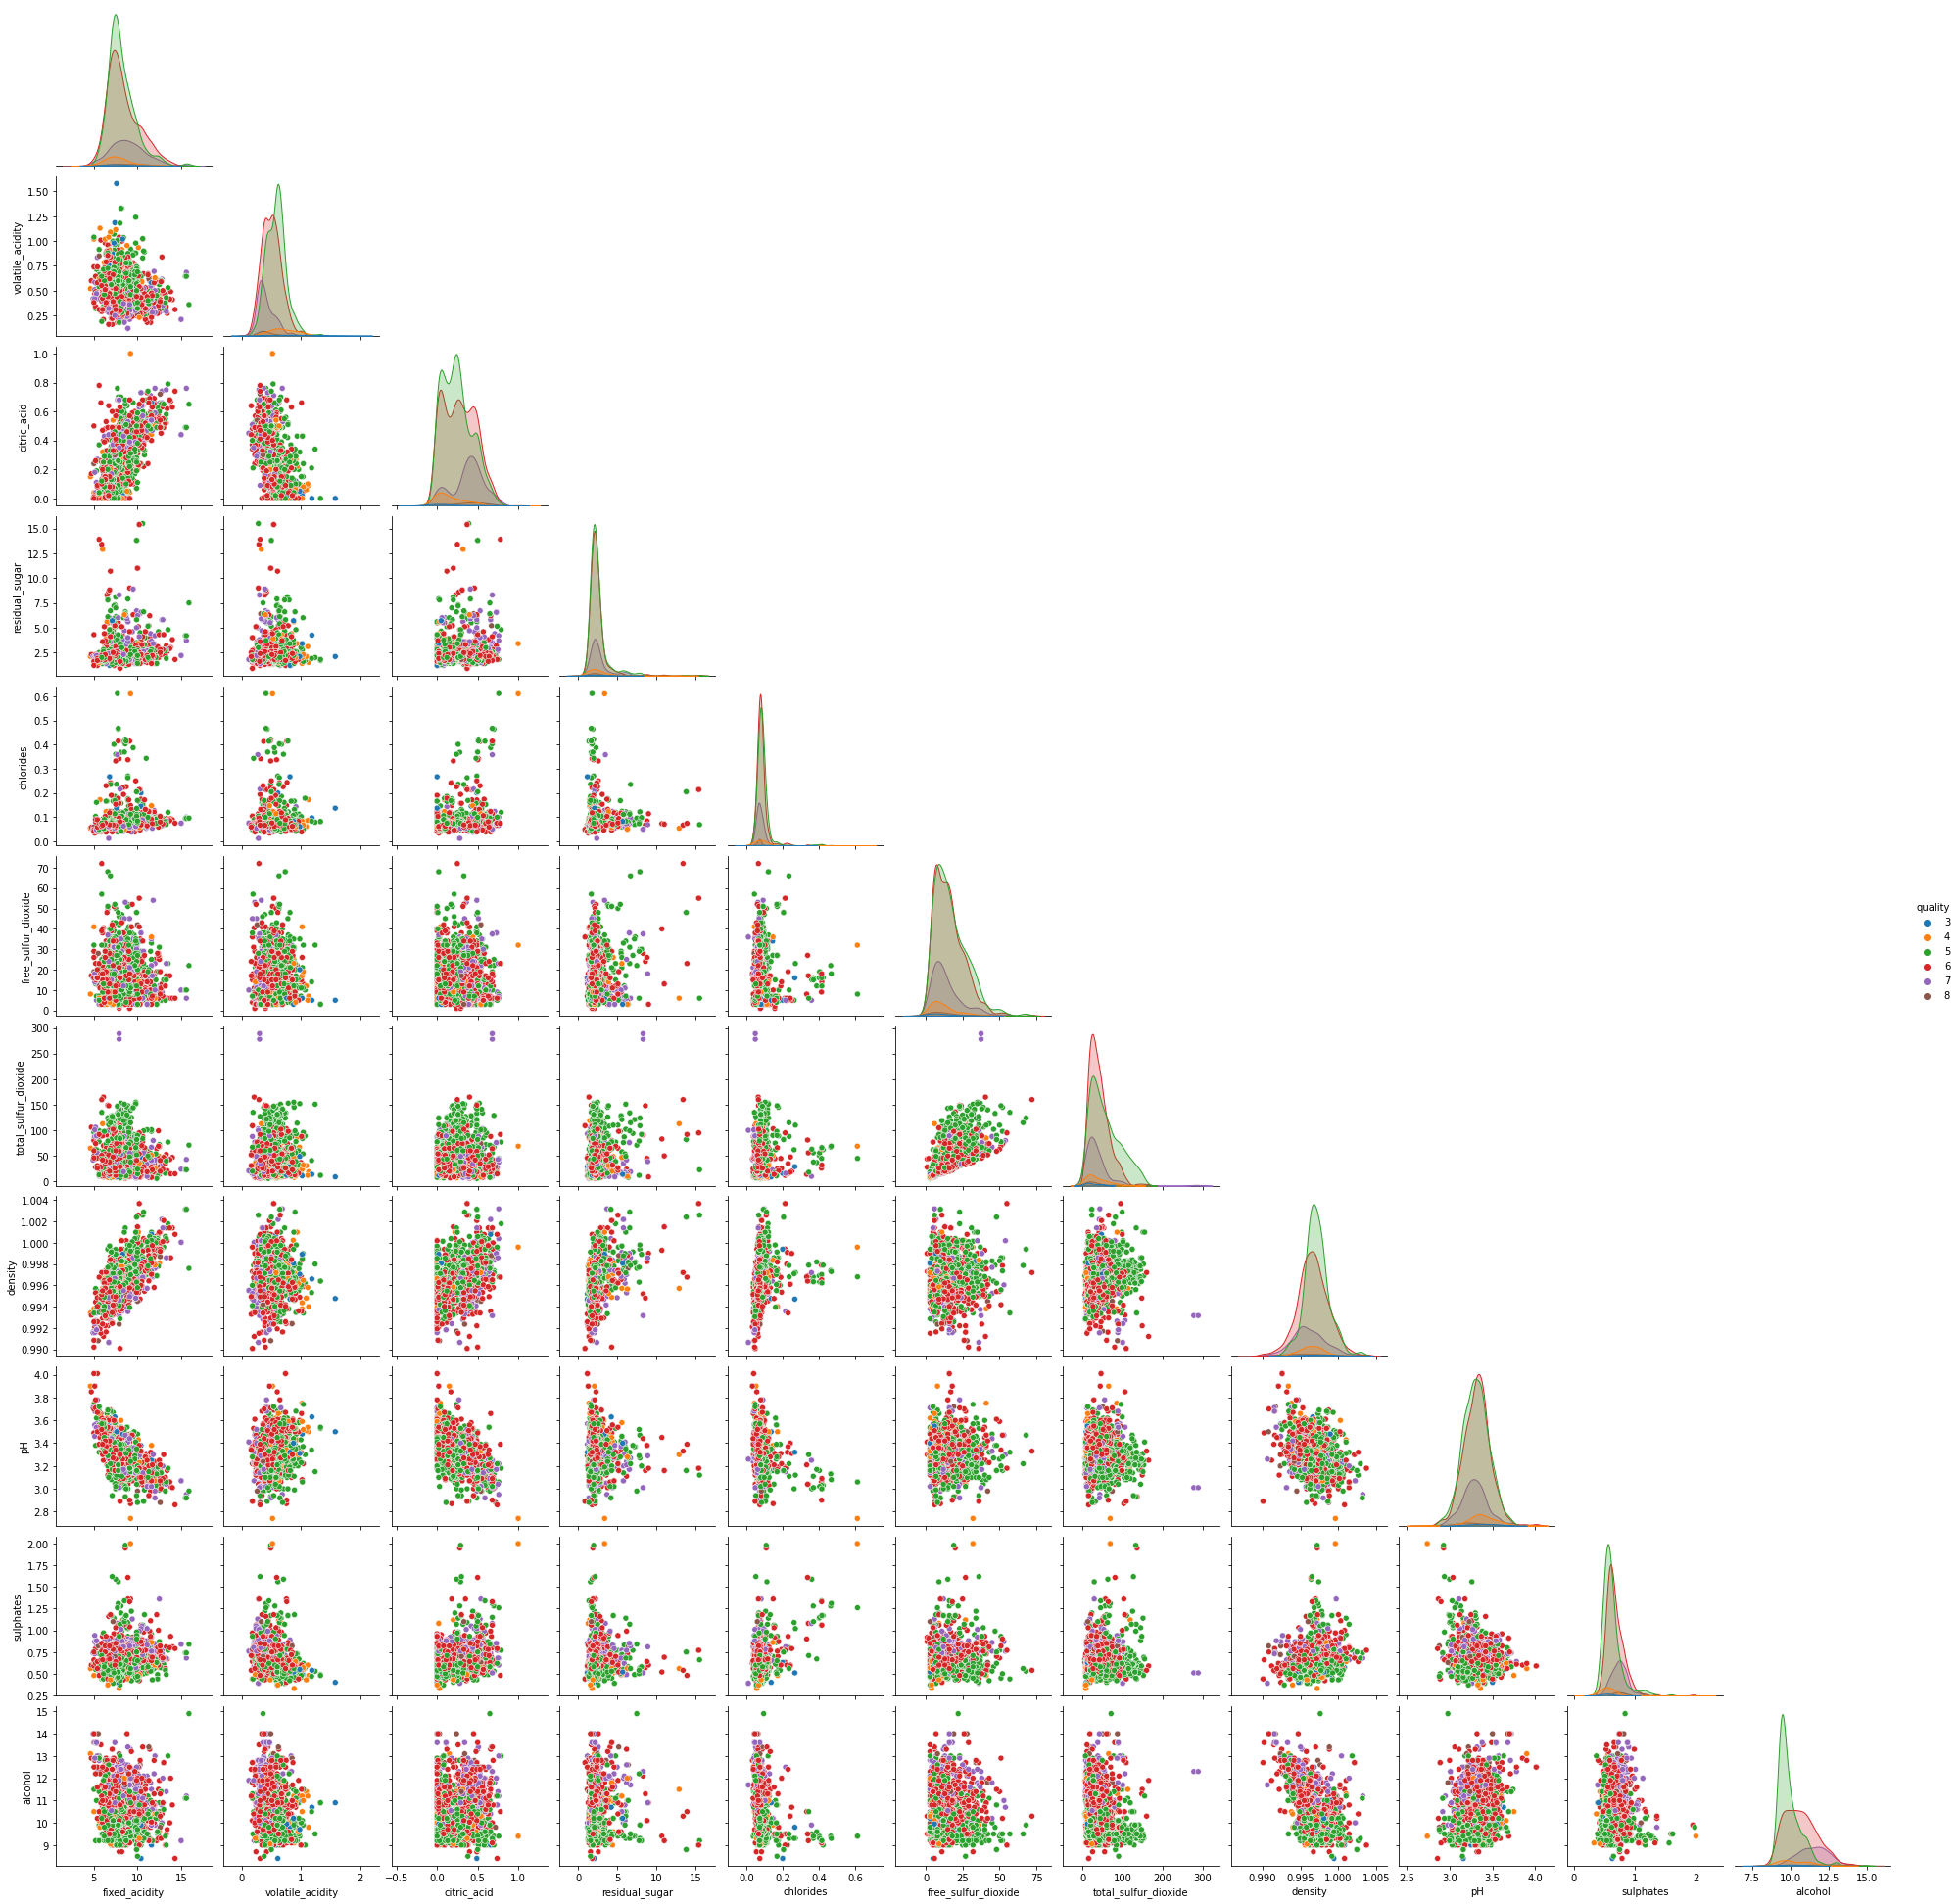

In [7]:
sns.pairplot(df, corner = True, diag_kind='kde', hue = 'quality')

Con el `sns.pairplot` lo que intento ver es la separación de los graficos de densidad. Variables cuyos graficos de densidad (curvas) esten más separados, más fácil será ver esas separaciones en un scatterplot

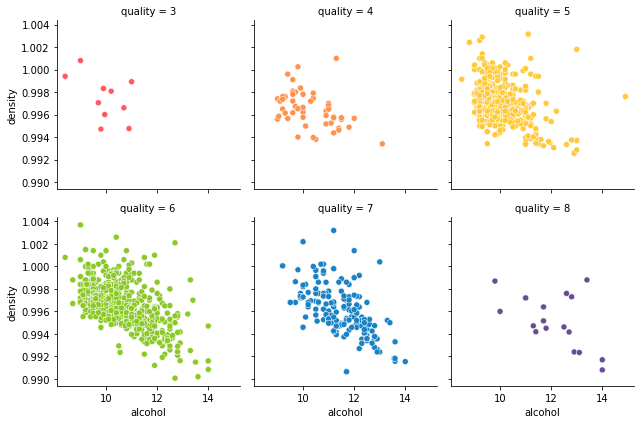

In [9]:
sns.relplot(data = df, x = 'alcohol', y = 'density', hue = 'quality',
            col = 'quality', col_wrap = 3, height = 3, aspect = 1, legend = False,
            palette=['#ff595e', '#FF924C', '#FFCA3A', '#8AC926', '#1982C4', '#6A4C93'])